# Neural Networks - Graph view

After this lecture you should:
* understand the computational graph abstraction and how it relates to backprob
* know the biggest difference in traditional and deep learning feature representations  [dense vs one-hot representations]

### Recap: Feed-forward Neural Network

We have seen how a neural network can be formalized, both algebraically and graphically. we can think of a feed-forward NN as a function $NN(\mathbf{x})$: $$y= NN(\mathbf{x}) $$

with:
input: $\mathbf{x}$ (vector with $d_{in}$ dimensions)

output: $\mathbf{y}$ (output with $d_{out}$ classes)

For example, we have seen last time that the following network can be formalized as:
<img src="pics/nn.png" width=300> 

$$NN_{MLP1}(\mathbf{x})=g(\mathbf{xW^1+b^1})\mathbf{W^2}+\mathbf{b^2}$$



### Where do the weights come frome?

Its an **optimization** problem. We want to find the weights that "work best". 

<img src="pics/mountains_at_home.jpg" width=500>

### Training a Neural Network: Ingredients

* we need to **define what "works best" means**
* we need **a way to change the model (parameters)** to get closer to a good model


### Defining what works best ~ how close we are: Loss

Measures how far 'off' we are from true solution:

$$L(\mathbf{\hat{y}},\mathbf{y})$$

For multi-class classification the **cross-entropy** is a commonly used loss function: 

$$L_{crossentropy}(\mathbf{\hat{y}},\mathbf{y})= - log(\hat{y}_i)$$


<img src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Error_surface_of_a_linear_neuron_with_two_input_weights.png">

### How to get closer to a good model


**Strategy 1:** random guessing

**Strategy 2:** start with some random initial parameters (weights), and randomly adjust them

**Strategy 3:** follow the gradient: analytical method to find the best direction along which we should change our weight vector: **gradient descent**

### To sum up: Ingredients for training a Neural Network

* we need to define what "works best" means 
    $\rightarrow$ minimize some **loss**
* we need a way to change the parameters to get closer to a good model
    $\rightarrow$ **minimize loss using a gradient-based method: gradient descent**

<img src="pics/optimization.png" width=700>


Intuitively, training a neural networks involves the following steps:

* compute the gradient of the loss function with respect to the parameters
* move the parameters in the negative direction of the gradient to decrease the loss

Skeleton of gradient descent:
    
**Input**: training set, loss function $L$

Repeat for number of iterations (**epochs**): 
 
* compute loss on data: $L(X,Y)$
* compute gradients: $\mathbf{g} = L(X,Y)$ with respect to $w$
* move parameters in direction of gradient: $w \pm -\eta \mathbf{g}$

We want to get an intuitive understanding of the **backpropagation** algorithm. Backprob is a way of computing **gradients** of expressions through applying the chain rule.

**What's a gradient?**: A vector of partial derivatives. So, in essence we want to calculate partial derivatives with respect to each parameter in the network. 


Recall: the **derivative** 

A derivative gives us a linear approximation of the function at a specific point. Intuitively, the derivative indicates the rate of change of a function $f$ with respect to a variable $x$ (surrounding the region around point $h$):

    
<img src="http://www.intuitive-calculus.com/images/what-is-a-derivative-4.gif">

### Example: gradient

Lets take a simple example of a function: $$f(x) = (x * y)$$ (or simply): $$f(x)=xy$$

We want to calculate the gradient, the vector of partial derivatives (how much does the function change wrt the parameters x and y): $$\nabla f = [\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}]$$


The partial derivatives of this function are:

$$f(x,y) = x y \hspace{0.5in} \rightarrow \hspace{0.5in} \frac{\partial f}{\partial x} = y \hspace{0.5in} \frac{\partial f}{\partial y} = x$$

In [25]:
## f(x) = (x+y)*z
# lets take some numbers 
### src: Example taken from: http://cs231n.github.io/optimization-2/ 
x = 4
y = -3

In [18]:
## forward pass (function application)
f = x * y
print(f)

-12


In [22]:
## the derivative of each variable tells us the sensitivity of the whole expression on its value. 
## for instance, take the partial derivative of f wrt y:
df_dy = x  # it's simply y 
print(x) # this means if we increase the y by a tiny amount, the whole function would increase by this amount.

4


In [23]:
## similarly, the partial derivative of f w.r.t. x is:
df_dx = y
print(y)  # changing x by some small amount would make the whole expression decrease (negative sign)

-3


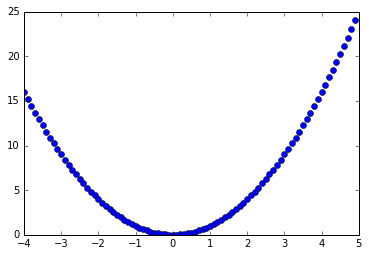

As summarized in http://cs231n.github.io/optimization-2/:

**the derivative on each variable tells you the sensitivity of the whole expression on its value**

add computation graph of our tiny example


In [28]:
### Example 2: compound expression

### Gradient

Our functions are not just functions of single parameters, but of a lot of parameters. We are interested in finding all partial derivatives, i.e. the gradient. For our example function: 

the gradient is:

 $$\nabla f = [\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}] = [y,x]$$


* computation graph for f(a,b) = (a*b+1)(a*b+2)
* sharing of a*b
* computation graph for 1-layer MLP
* explain notation

<img src="pics/yg-compgraph1.png">

## References

* Yoav Goldberg's primer chapter 6: [A Primer on Neural Network Models for Natural Language Processing](http://arxiv.org/abs/1510.00726)
* http://cs231n.github.io/optimization-2/